In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tqdm

In [2]:
data_path = 'datasets/simplelines/'


def load_data(name, path):
    dataset = []
    data_path = path + name
    
    
    
    for file_name in os.listdir(data_path):
        img = cv2.imread(os.path.join(data_path, file_name))
        img = np.array(img)
        dataset.append(img)
        
    return np.array(dataset)

hr = load_data('hr', data_path)
lr = load_data('lr', data_path)


In [3]:
x_train, x_test = lr[:int(lr.shape[0] * 0.7)], lr[int(lr.shape[0] * 0.7):]
y_train, y_test = hr[:int(hr.shape[0] * 0.7)], hr[int(hr.shape[0] * 0.7):]

batch_size = 32

Unneccessary

In [4]:
# x_train = tf.data.Dataset.from_tensor_slices(x_train).batch(32)
# x_test = tf.data.Dataset.from_tensor_slices(x_test).batch(32)


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100, 100, 3)),
    tf.keras.layers.Conv2D(1, (4, 4), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    tf.keras.layers.Conv2D(1, (4, 4), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    tf.keras.layers.Conv2D(1, (4, 4), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.experimental.preprocessing.Resizing(500, 500, interpolation='bilinear'),
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    tf.keras.layers.Conv2D(1, (4, 4), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(3, 3, padding='same', activation='relu')
    
])


In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100, 100, 3)),
    tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(1, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.UpSampling2D((5, 5)),
    tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(1, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2DTranspose(3, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(3, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(3, (5, 5), padding='same', activation='relu'),

])

In [55]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_30 (Conv2  (None, 100, 100, 1)       28        
 DTranspose)                                                     
                                                                 
 conv2d_transpose_31 (Conv2  (None, 100, 100, 1)       10        
 DTranspose)                                                     
                                                                 
 conv2d_transpose_32 (Conv2  (None, 100, 100, 1)       26        
 DTranspose)                                                     
                                                                 
 up_sampling2d_15 (UpSampli  (None, 500, 500, 1)       0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_33 (Conv2  (None, 500, 500, 1)     

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

In [58]:
model.save_weights("models/CNN/")
model.save("models/CNN/")

INFO:tensorflow:Assets written to: models/CNN/assets


INFO:tensorflow:Assets written to: models/CNN/assets


In [16]:
pred = np.array(model(x_test[1:1+1:]))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


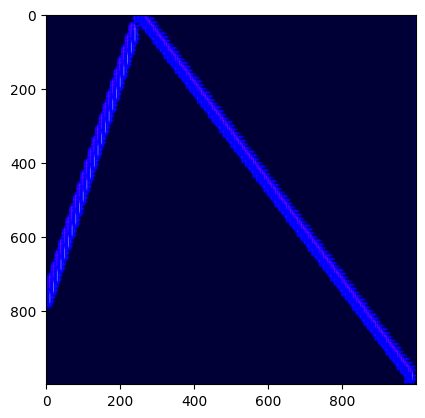

In [17]:
plt.imshow(pred[0])
plt.show()
